# Task7 COVID-19 Hackathon

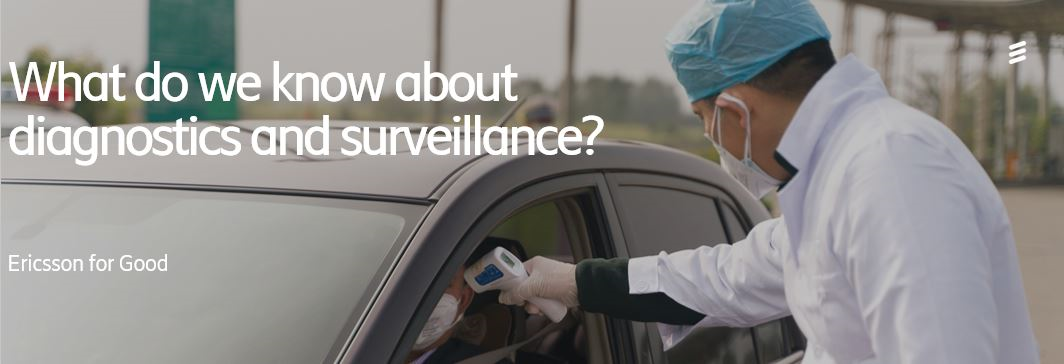

<div class="alert alert-block alert-info">
<b>Introduction</b>
Science and technology communities across the world have come together to address issues related to the COVID-19 virus and ensuing pandemic. The CORD-19 research dataset represents the most extensive machine-readable COVID-19 literature collection of over 50,000 scientific articles available for data mining to date. However, the rapid increase in the volume and type of COVID-19 literature makes it difficult for members of the medical community to find what they need.
<br>
<br>
The focus of Task 7 was to create an artificial intelligence model that effectively searches the CORD-19 database and finds research papers answering the Task 7 questions: “What do we know about diagnostics and surveillance?” and “What has been published concerning systematic, holistic approach to diagnostics (from the public health surveillance perspective to being able to predict clinical outcomes)?”
<br>
<br>
This notebook compiles available, relevant research articles to help the medical community find answers on diagnostics and surveillance as relating to COVID-19, as well as to find answers within and connect insights across the 19 subtask questions that comprise Task 7. 
<br>
<br>
By providing the research and tools needed to empower decision makers to lead and manage this pandemic more effectively, this notebook contributes to the ongoing COVID-19 response efforts worldwide.
<br>
<br>
The picture below shows our solution framework that will be used throughout this notebook.<br>
</div>


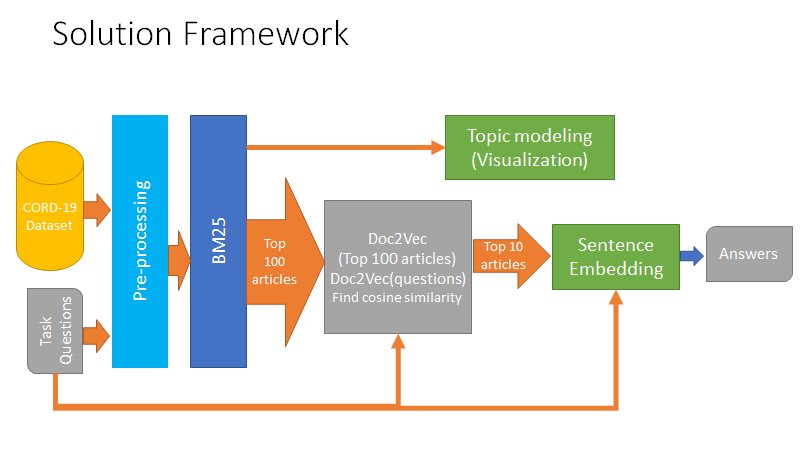

# Pre-processing the dataset from Kaggle

<div class="alert alert-block alert-info">   
<h1>Pre-Processing</h1><br>
Pre-Processing transforms raw data into a format required for modeling, resulting in retaining the critical keywords to improve the efficiency of the retrieval process, as well as the accuracy of the results. 
<br>
Activities involved in this step were:<br> 
&emsp;&emsp;a.	Discarding duplicate articles <br>
&emsp;&emsp;b.	Discarding articles with less than 1200 characters <br> 
&emsp;&emsp;c.	Filling missing publish-time value for a given article by using the year of the most-recent cited article in the bibliography <br> 
&emsp;&emsp;d.	Discarding non-English articles <br> 
&emsp;&emsp;e.  Discarding articles published earlier than "earliest_publication_year" specified as an input by the user <br> 
&emsp;&emsp;f.	Changing words to lower case <br> 
&emsp;&emsp;g.	Removing stop_words <br> 
&emsp;&emsp;h.	Lemmatization to group together the inflected forms of a word so they can be analyzed as a single item <br> 
&emsp;&emsp;i.	Stemming to reduce inflected words to their word stem, base or root form—generally a written word form <br>
</div>

<div class="alert alert-block alert-info">
<h1> Finding top matching articles for each task query </h1>
<h2>BM25</h2>
We use a Bag_of_Words retrieval function called Okapi BM25 to select the top 100 articles related to each task query. BM25, the abbreviation of Best Matching25, is a probabilistic information retrieval ranking method. It ranks documents based on a relevance score which is the probability of a document being relevant to the input query. This relevance score is computed using the input query words and improving the term-frequency-inverse-document-frequency (TF-IDF) method.<br>
      
<br><h2>Doc2Vec</h2>
After running BM25, we still have a large set of articles (100 articles) for each task query. To fine tune our search even further, we use the document embedding method Doc2vec. Doc2vec generates a numeric representation of documents. It is based on the well-known word embedding method word2vec. We use Doc2Vec to vectorize each of the top 100 articles (per task query) and also vectorize the task queries. Then we find the top 10 closest articles to each query. <br> 
    
<br><h2>Pros and cons of Doc2Vec and BM25</h2>
Similar to Word2Vec, Doc2Vec is a semantic model which performs reasonably well on sentence similarity tasks. But it can be slow when dealing with large corpus of data. On the other hand, BM25 is not a semantic model, but it is more efficient (i.e runs faster) to rank large number of documents according to their relevance to a given search query. That's why we combine the two approaches to benefit from strength of each method.<br> 
    
<br><h1>Finding answers from top articles</h1><br>
<h2>Sentence Embedding</h2>
A core part of the Natural Language Processing (NLP) tasks is the concept of an "embedding". 
The Sentence Embeddings work based on sentence-level semantic similarity. 
In other words, they encode sentences into vectors in processing of textual data
to improve the accuracy of text classification.<br>
    
<br>We tested two methods to find highlights of the top articles:
<li> Summarization </li>
<li> Sentence Embedding </li>
    
<br> Pros and cons: <br>
Although summarization can also provide a highlight of an article, the highlights are not necessarily related to the task query. However, Sentence Embedding finds sentences of the article that are closest to the query. We use Doc2Vec method to vectorize each sentence. Also, each question is vectorized. Then, the algorithm finds the sentences that have lowest cosine similarity to the questions.
The code here doesn't include "Summarization" as "Sentence Embedding" outperformed Summarization.<br>
    
<br><h1>Topic Modeling </h1>
Topic modeling is an unsupervised machine learning technique that automatically 
creates clusters (or groups) of topics based on the contents from a large collection of documents. 
Topics are represented as word distribution in the documents. Intuitively, given that a document is about a 
particular topic, one would expect particular words to appear in the document more or less frequently.
It is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. In this notebook, we use topic modeling for visualization. For better visualization, interactive topic modeling visualization are presented in HTML formate for each question in an output folder called "Topic_Modeling_Visualization" <br>
    
<br><h1>Answers </h1><br>
Answers are conveyed in a tabular fomat with the information of the most-related 10 papers to each question. The table includes URL, publish date, title, and the highlights of each article. For convenience, the answers are presented in three different formats:

<li> HTML format in a file called "Task7_Answers.html" </li>
<li> EXCEL format in a file called "Task7_Answers.xlsx"  </li>
<li>  Printed fomrat in the notebook </li>
To further improve the presentation of the answers, word-cloud visualizations of the highlight of the top 10 papers for each question is also provided.
</div>

# Inputs
This section is the __only__ section that needs to be modified by the user to be able to __reuse__ this notebook to effectively searches the CORD-19 database and finds research papers answering given questions. While the notebook is being used herein to answer questions specified in Task 7, it is generic enough and can be used to answer any questions from the CORD-19 database.

The inputs consist of the following:
- __earliest_publication_year__: specify the earliest year after which the articles will be used to retrive the answer. For instance, the default value is 2002 which is the year when the SARS outbreak started. The user may also choose to set it to 2014 or 2019, the years where Ebola outbreak and covid-19 outbreak started, respectively. Setting this value to -1 will let the code search for all articles regardless of the publication year.
- __questions__: a list of questions that need to be answered. For instance, this can be a list of questions in Task 7 in the COVID-19 Hackathon.
- __keywords__: a list of keywords where each element correspond to one question in the list questions. This is used to improve the efficiency of the retrieval process, as well as the accuracy of the results. This list can be left empty and in this case, keywords will be set equal to questions.

The notebook below will use keywords to retrieve the answers and questions for displaying the results


In [ ]:
## Earliest publication year
earliest_publication_year = 2002 # this is the year where SARS outbreak happened
## Questions
questions = [
    'How widespread current exposure is to be able to make immediate policy recommendations on mitigation measures. Denominators for testing and a mechanism for rapidly sharing that information, including demographics, to the extent possible. Sampling methods to determine asymptomatic disease (e.g., use of serosurveys (such as convalescent samples) and early detection of disease (e.g., use of screening of neutralizing antibodies such as ELISAs).',
    'Efforts to increase capacity on existing diagnostic platforms and tap into existing surveillance platforms.',
    'Recruitment, support, and coordination of local expertise and capacity (public, private—commercial, and nonprofit, including academic), including legal, ethical, communications, and operational issues.',
    'National guidance and guidelines about best practices to states (e.g., how states might leverage universities and private laboratories for testing purposes, communications to public health officials and the public).',
    'Development point of care test (like a rapid influenza test) and rapid bedside tests, recognizing the tradeoffs between speed, accessibility, and accuracy.',
    'Rapid design and execution of targeted surveillance experiments calling for all potential testers using PCR in a defined area to start testing and report to a specific entity. These experiments could aid in collecting longitudinal samples, which  are critical to understanding the impact of ad hoc local interventions (which also need to be recorded).',
    'Separation of assay development issues from instruments, and the role of the private sector to help quickly migrate assays onto those devices.',
    'Efforts to track the evolution of the virus (i.e., genetic drift or mutations) and avoid locking into specific reagents and surveillance/detection schemes.',
    'Latency issues and when there is sufficient viral load to detect the pathogen, and understanding of what is needed in terms of biological and environmental sampling.',
    'Use of diagnostics such as host response markers (e.g., cytokines) to detect early disease or predict severe disease progression, which would be important to understanding best clinical practice and efficacy of therapeutic interventions.',
    'Policies and protocols for screening and testing.',
    'Policies to mitigate the effects on supplies associated with mass testing, including swabs and reagents.',
    'Technology roadmap for diagnostics.',
    'Barriers to developing and scaling up new diagnostic tests (e.g., market forces), how future coalition and accelerator models (e.g., Coalition for Epidemic Preparedness Innovations) could provide critical funding for diagnostics, and opportunities for a streamlined regulatory environment.',
    'New platforms and technology (e.g., CRISPR) to improve response times and employ more holistic approaches to COVID19 and future diseases.',
    'Coupling genomics and diagnostic testing on a large scale.',
    'Enhance capabilities for rapid sequencing and bioinformatics to target regions of the genome that will allow specificity for a particular variant.',
    'Enhance capacity (people, technology, data) for sequencing with advanced analytics for unknown pathogens, and explore capabilities for distinguishing naturallyoccurring pathogens from intentional.',
    'One Health surveillance of humans and potential sources of future spillover or ongoing exposure for this organism and future pathogens, including both evolutionary hosts (e.g., bats) and transmission hosts (e.g., heavily trafficked and farmed wildlife and domestic food and companion species), inclusive of environmental, demographic, and occupational risk factors.'
]
## keywords
keywords = [
    'widespread current exposure immediate policy recommendations mitigation measures denominators case fatality rate testing mechanism sharing information demographics Sampling methods asymptomatic carriers transmission disease serosurveys convalescent samples early detection disease screening neutralizing antibodies ELISA IgG enzymelinked immunosorbent assay',
    'efforts increase capacity existing diagnostic platforms existing surveillance platforms National Respiratory Enteric Virus Surveillance System (NREVSS)', 
    'Recruitment support coordination local expertise public private commercial nonprofit NPO academic legal ethical communications operational issues',
    'USA U.S. National Federal guidance guidelines best practices standards states Communications leverage universities private laboratories testing purposes communications public health officials public)',
    'care rapid influenza test speed accuracy accessibility Development care test Detection pandemic influenza accuracy rapid influenza testing Diagnostic performance nearpatient testing influenza',
    'pattern pcr intention invention innovation conception performance implementation surveillance potential testers examination composition entity aid longitudinal vital decisive interpret translate tool distributed disease surveillance Rapid design execution targeted surveillance potential testers PCR COVID understanding impact  adhoc local interventions COVID Social Contact Network Epidemic Outbreak',
    'interval assay evolution growth maturation ontogeny exploitation developing sector sphere aid quickly rapidly migrate daignostic assays migrate assays devices private sector infectious diseasea assay development issues',
    'development evolution phylogeny virus tocopherol familial genetic hereditary inherited transmitted transmissible drift impetus trend surveillanced etection sensing detecting Efforts track evolution virus evolution virus genetic drift influenza virus mutation covid usa tracking pandemic virus computational analysis mutation',
    'Latency issues Latency period Detect pathogen Viral load Biological sampling Environmental sampling Proactive holistic approach Detecting viruses early source Zoonotic diseases Risk exposure people Surveillance science Diagnostic technologies early detection identification Contracting disease displaying symptoms Time lag testing patients Incubation period Surface samples',
    'Diagnostics Host response markers Detect early disease Predict severe disease progression Understanding best clinical practice Therapeutic interventions Therapeutic Management Treatment guidelines Symptom screening',
    'Policies Protocols screening testing Interstate travel Global travel increased testing capacity Social distancing Selfquarantine rules Contact tracing',
    'Policies Mitigate effects supplies Mass testing Swabs reagents Efficient emergency Management system National stockpile Wartime presidential power Task force',
    'geospatial data visualization platform technology Tectonix cellphone heat maps detecting movement virus hotspots mobile phone heat map technology detecting virus hotspot movement sentinel fever tracker technology technology infrastructure Rapid Sharing covid19 Results technology platform Rapid Sharing covid19 Results ventilator sharing technology convid19 surveillance technology mass screening infrared thermal detection technology systems remote health monitoring technology covid19 SARSCoV2 RNA signature detection technology covid19 SARSCoV2 detection technology loopmediated isothermal amplification LAMP covid19 SARSCoV2 remote patient monitoring technology covid19 SARSCoV2 mass antibody testing platform early detection of lung infiltrate',
    'Developing Scaling up Diagnostic tests Future coalition Accelerator models Streamlined regulatory environment Detect National, Global collaboration Global Health Security Translational medicine Novel therapeutics Automation Technological innovation FDA Laboratory Accurate, Reliable, Reproducible Testing Global access Medical countermeasures National policy framework WHO Legal, regulatory, logistical and funding barriers the highest bidder?',
    'New platforms Technology Improve response time holistic approach Future diseases Pathogenesis Immunity Transdisciplinary approaches Transboundary health issues Social–ecological understanding Diagnosis RNA genome Microbial infection Serological assay Respiratory infection Genomic characteristics Molecular tests Rapid detection Early identification Screening patients Virus surveillance Detection Assays',
    'genetic synthesis Gene Sequencing Assays detect SARSCoV2 genetic code genome sequencing RNA Genome sequence DNA genes sequencing Nucleic acidbased Nucleic acid genomic sequences diagnosis clinical testing testing Detecting, detect, detection diagnostic assays Diagnose diagnostics Largescale Large scale',
    'rapid sequencing bioinformatics target regions of the genome variant covid19 SARS SARSCoV2 ebola',
    'technology data sequencing advanced analytics unknown pathogens capabilities distinguishing naturallyoccurring pathogens intentional Covid19; SARS SARSCov ebola',
    'health surveillance virus spillover animals humans future pathogens evolutionary hosts bats transmission hosts heavily trafficked farmed wildlife domestic food companion species environmental demographic Covid19 SARS Cov2 SARS ebola'
    ]

### Downloading and Installing Packages

In [ ]:
!pip install rank_bm25
!pip install swifter
!pip install yattag
!pip install langdetect

## Importing Packages

In [ ]:
#All the import functions

#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from matplotlib import colors
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# spacy for lemmatization
import spacy

from rank_bm25 import BM25Okapi
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize , RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
from difflib import SequenceMatcher , get_close_matches, Differ
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import string
from textblob import Word
import collections
import scattertext as st
import prettytable
import zipfile
import textwrap
import datetime as dt
import swifter
import multiprocessing as mp
import gc


#nltk.download()
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words())
nltkwords = set(nltk.corpus.words.words())


from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

from IPython.display import IFrame
import glob
from nltk.tokenize.toktok import ToktokTokenizer
from yattag import Doc, indent
from langdetect import detect

#for topic modeling
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout
import warnings
warnings.filterwarnings('ignore') # warnings are not needed in production code

## Defining directories

In [ ]:
downloadPath = ('/kaggle/input/CORD-19-research-challenge')

## Data Preprocessing

In [ ]:
#Define utilities for data parsing

def affiliation_parsing(x: dict) -> str:
    """Parse affiliation into string."""
    current = []
    for key in ['laboratory', 'institution']:
        if x['affiliation'].get(key):  # could also use try, except
            current.append(x['affiliation'][key])
        else:
            current.append('')
    for key in ['addrLine', 'settlement', 'region', 'country', 'postCode']:
        if x['affiliation'].get('location'):
            if x['affiliation']['location'].get(key):
                current.append(x['affiliation']['location'][key])
        else:
            current.append('')
    return ', '.join(current)


def cite_parsing(x: list, key: str) -> list:
    """Parse references into lists for delimiting."""
    cites = [i[key] if i else '' for i in x] #test['body_text']]
    output = []
    for i in cites:
        if i:
            output.append(','.join([j['ref_id'] if j['ref_id'] else '' for j in i]))
        else:
            output.append('')
    return '|'.join(output)


def extract_key(x: list, key:str) -> str:
    if x:
        return ['|'.join(i[key] if i[key] else '' for i in x)]
    return ''

# This function is used to return the year of the latest cited paper
def latest_cited_paper_year(x):
    try: 
        years = [i['year'] for i in x.values() if (i['year'] != None)]
        today = dt.datetime.today()
        today_year = today.year
        # cap years to today's year
        years = [year for year in years if year <= today_year]
        if (years != None) & (years != []):
            return dt.datetime(max(years),1,1)
        else:
            return None
    except:
        return None

extract_func = lambda x, func: ['|'.join(func(i) for i in x)]
format_authors = lambda x: f"{x['first']} {x['last']}"
format_full_authors = lambda x: f"{x['first']} {''.join(x['middle'])} {x['last']} {x['suffix']}"
format_abstract = lambda x: "{}\n {}".format(x['section'], x['text'])
all_keys = lambda x, key: '|'.join(i[key] for i in x.values())

In [ ]:
%%time

# This section converts all the JSON files to a aggregated dataframe

aggregate_dflist = []
for path in ['biorxiv_medrxiv', 'comm_use_subset', 'custom_license', 'noncomm_use_subset']:
    for subpath in ['pdf_json','pmc_json']:
        if not os.path.exists(f'{downloadPath}/{path}/{path}/{subpath}/') : continue
        json_files = [file for file in os.listdir(f'{downloadPath}/{path}/{path}/{subpath}/') if file.endswith('.json')]
        df_list = []
                
        for js in json_files:
            
            with open(os.path.join(f'{downloadPath}/{path}/{path}/{subpath}', js)) as json_file:
                paper = json.load(json_file)
                
            paper_df = pd.DataFrame({
                'paper_id': paper['paper_id'],
                'title': paper['metadata']['title'],
                'authors': extract_func(paper['metadata']['authors'], format_authors),
                'full_authors': extract_func(paper['metadata']['authors'], format_full_authors),
                'affiliations': extract_func(paper['metadata']['authors'], affiliation_parsing),
                'emails': extract_key(paper['metadata']['authors'], 'email'),              
                'body': extract_func(paper['body_text'], format_abstract),
                'body_cite_spans': cite_parsing(paper['body_text'], 'cite_spans'),
                'body_ref_spans': cite_parsing(paper['body_text'], 'ref_spans'),
                'bib_titles': all_keys(paper['bib_entries'], 'title'),
                'latest_cited_paper_year': latest_cited_paper_year(paper['bib_entries']),
                'ref_captions': all_keys(paper['ref_entries'], 'text'),
                'back_matter': extract_key(paper['back_matter'], 'text')
            })
            df_list.append(paper_df)
            
        if len(df_list) > 0:
            temp_df = pd.concat(df_list)
            temp_df['dataset'] = path+'_'+subpath
            aggregate_dflist.append(temp_df)
aggregate_df = pd.concat(aggregate_dflist)
del temp_df 
del aggregate_dflist

In [ ]:
######################## Remove duplicate articles ##############
aggregate_df = aggregate_df[(~aggregate_df['title'].duplicated()) | (aggregate_df['title']=='')]

In [ ]:
#Merge from Metadata file URL, Journal, Publish time
metadata_df = pd.read_csv(f'{downloadPath}/metadata.csv',parse_dates = ['publish_time'])
covid_csv = pd.merge(aggregate_df, metadata_df[['sha','journal','publish_time','url' ]], left_on = 'paper_id', right_on = 'sha', how = 'left')
covid_csv.drop(['sha','bib_titles','ref_captions','body_cite_spans','back_matter','emails','body_ref_spans'], axis = 1, inplace=True)
del metadata_df
del aggregate_df
gc.collect();

In [ ]:
## Remove articles that has text less than 1200 characters
covid_csv = covid_csv[covid_csv['body'].str.len() > 1200]

In [ ]:
# Fill the missing publish times with approximate time using the year of the latest cited article in the paper
print('Percentage of articles with missing publish-time BEFORE filling missing values = ' +
       str(round(100*sum(covid_csv['publish_time'].isna())/len(covid_csv))) + '%'
     )

covid_csv['publish_time'].fillna(covid_csv['latest_cited_paper_year'], inplace=True)
covid_csv.drop(['latest_cited_paper_year'], axis = 1, inplace=True)

print('Percentage of articles with missing publish-time AFTER filling missing values = ' +
       str(round(100*sum(covid_csv['publish_time'].isna())/len(covid_csv))) + '%'
     )
# fill the remaining publish_time values with 1900,7,1
covid_csv.fillna({'publish_time':dt.datetime(1900,7,1), 'url':'UNSPECIFIED'}, inplace=True)

In [ ]:
########### Gets dataset after a particular earliest_publication_year, if earliest_publication_year = -1 gets whole dataset #########
#Functions
def get_year(x):
    year = int(x.split('-')[0])
    return year

def get_year_timestamp(x):
    year = x.year
    return year


def get_df_afterdate(df, date):
    if date == -1:
        df2 = df
    else:
        df2 = df[df['publish_time'].apply(get_year_timestamp) >= date]
    return df2    

print('Number of total articles BEFORE filtering the articles by earliest_publication_year= ' +
      str(len(covid_csv)))
covid_csv = get_df_afterdate(covid_csv, earliest_publication_year)
print('Number of total articles After filtering the articles by earliest_publication_year= ' +
      str(len(covid_csv)))

In [ ]:
##### Keep only english papers
def detect_lang(text):
    try:
        portion=text[1000:2000]
        lang=detect(portion)
    except Exception:
        lang=None
    
    return lang
covid_csv['Language'] = covid_csv['body'].progress_apply(detect_lang)
covid_csv = covid_csv[covid_csv['Language'] == 'en']
del covid_csv['Language']
gc.collect();

In [ ]:
#this function plot the histogram of dates of articles 
def get_date_hist(df):
    plt.rcParams['figure.figsize'] = (15,6)
    fig, ax = plt.subplots(1,1) 
    
    years = df['publish_time'].apply(get_year_timestamp).values
    years, counts = np.unique(years, return_counts=True)
    ax.bar(years, counts)
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    ax.set_title('Histogram of date of articles ')
    ax.set_xlabel('Date of article')
    ax.set_ylabel('Number of articles')

    
    plt.show()
    
get_date_hist(covid_csv)

In [ ]:
%%time
####### Changing words to lower case + Remove stop_words +Lemmatization + Stemming ##########
def getCleanText(text):
    if type(text) != str or len(text) <1000 :
        return ''
    toktok = ToktokTokenizer()
    tokens = toktok.tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha() and word not in stop_words and word in nltkwords]
    text = " ".join(words)
    return text
#preprocessing 'body' attribute
covid_csv['processed_body'] = covid_csv.progress_apply(lambda row: getCleanText(row['body']), axis=1)

In [ ]:
# decide whether to use questions or keywords for answer retrival based on 
# user input
try:
    keywords
except NameError:
    # keywords is not defined, use questions for retriving the answers
    queries = questions
else:
    if len(questions) == len(keywords):
        # keywords is defined and it has the same length as questions, 
        # use keywords for retriving the answers
        queries = keywords
    else:
        # keywords is defined but it does not have the same length as questions, 
        # use questions for retriving the answers
        queries = questions

#Convert queries to lower case
queries = [query.lower() for query in queries]

### BM25 functions

In [ ]:
def get_top100_bm25_per_question(question_id, questions, bm25_index, original_df_corpus, orignal_df):
    #tokenize queries          
    tokenized_query = questions[question_id].split(" ")
   
    top_doc_list = bm25_index.get_top_n(tokenized_query, original_df_corpus, n=100)   
    top_doc_list_paper_id = [orignal_df.iloc[original_df_corpus.index(top_doc_list[j])].paper_id for j in range(len(top_doc_list))]
    
    return top_doc_list_paper_id
   

In [ ]:
def get_top100_bm25_questions(questions, orignal_df):
    corpus = [orignal_df['processed_body'].iloc[i] for i in range(len(orignal_df))]
    tokenized_corpus = [gensim.utils.simple_preprocess(orignal_df['processed_body'].iloc[i]) for i in range(len(orignal_df))]
    
    print('Generating BM25 index...')
    bm25_index = BM25Okapi(tokenized_corpus,k1=11.5,b=0.001)
    print('BM25 Index generated')
    
    top_docs_df = pd.DataFrame(columns=['question', 'top_docs'])
    for i in range(len(questions)):
        top_doc_list_paper_id = get_top100_bm25_per_question(i, questions, bm25_index, corpus, orignal_df)
        top_docs_df = top_docs_df.append({'question': questions[i], 'top_docs': top_doc_list_paper_id}, ignore_index=True) 
    
    return top_docs_df   

### Doc2vec functions

In [ ]:
def read_corpus2(df, tokens_only=False):
    for i in range(len(df)):
        tokens = gensim.utils.simple_preprocess(df['processed_body'].iloc[i])      
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [df['paper_id'].iloc[i]])


In [ ]:
#save topn documents returned from BM25 in a dataframe (paper_id, processed_text)
def get_topn_dataframe(listOfIds, origin_df):
#     top_ar = literal_eval(listOfIds)
    top_ar = listOfIds
    text = []
    for j in top_ar:
        row_index = origin_df.index[origin_df.paper_id == j]
        text.append(origin_df.loc[row_index]['processed_body'].values[0])

    top_docs_out = pd.DataFrame(columns=['paper_id', 'processed_body'])
    top_docs_out['paper_id'] = top_ar
    top_docs_out['processed_body'] = text
    
    return top_docs_out

In [ ]:
#get most similar documents to the question using doc2vec
def get_top10_doc2vec_per_question(question_id, questions, top100, original_df):
    top_docs = get_topn_dataframe(top100.top_docs[question_id], original_df)
    top_docs = top_docs.append({'paper_id': str(question_id), 'processed_body': questions[question_id]}, ignore_index=True)

    #get training set and build doc2vec model
    train_corpus = list(read_corpus2(top_docs))
    model = gensim.models.doc2vec.Doc2Vec(vector_size=120, 
#                                           min_count=10, 
                                          dm_mean=1, 
                                          epochs=100,
                                          window = 2,
#                                           batch_words=25000, 
                                          workers=mp.cpu_count(), 
                                          seed=420)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    # Free up some memory
    model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True) 
    
    question_corpus_id = 100
    inferred_vector = model.infer_vector(train_corpus[question_corpus_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=10)
    top_ids = [sim[0] for sim in sims]
    
    return top_ids


In [ ]:
#get most similar documents to all questions using doc2vec
def get_top10_doc2vec_questions(questions, top100, original_df):
    top_docs2 = pd.DataFrame(columns=['question', 'top_docs'])
    
    for i in range(len(top100.top_docs)):
#     for i in range(0,1):
        top10_ids = get_top10_doc2vec_per_question(i, queries, top100, original_df)
        top_docs2 = top_docs2.append({'question': top100.question[i], 'top_docs': top10_ids}, ignore_index=True)
    
    return top_docs2

## Find the closest 100 papers for each question using BM25

In [ ]:
%%time
top100 = get_top100_bm25_questions(queries, covid_csv)

## Find the closet 10 papers for each question using Doc2Vec

In [ ]:
%%time
top10 = get_top10_doc2vec_questions(queries, top100, covid_csv)

## Topics visualization for top 10 articles retrieved for each question
For better visualization, interactive topic modeling visualization are presented in HTML format for each question in an output folder called "Topic_Modeling_Visualization".

In [ ]:
#add html text to visualization output
def add_html_text(file_name, q_id, text):
    f = open(file_name,'a+')

    message = """<html>
    <head></head>
    <body><b>Question </b><b>""" + str(q_id+1) +""":</b>"""+ text+"""</body>
    </html>"""

    f.write(message)
    
    f.close()
    
#generate topic modeling visualization for one question
def topic_modeling_visualization(question_id_to_be_visualized, top10, questions, original_df): 
    top10_qi = top10.top_docs.iloc[question_id_to_be_visualized]
    if str(question_id_to_be_visualized) in top10_qi:
        top10_qi.remove(str(question_id_to_be_visualized))
    corpus = [original_df.processed_body[(original_df.paper_id == top10_qi[i])].values[0] for i in range(len(top10_qi))]
    count_vectorizer = CountVectorizer()
    count_data= count_vectorizer.fit_transform(corpus)

    # Create and fit the LDA model
    number_topics = 4
    lda = LDA(n_components=number_topics,random_state=0)
    lda.fit(count_data)
    
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    file_html = 'Topic_Modeling_Visualization/topic_modeling_visualization_for_Q_'+str(question_id_to_be_visualized+1)+'.html'  

    pyLDAvis.save_html(LDAvis_prepared, file_html)
    add_html_text(file_html, question_id_to_be_visualized, questions[question_id_to_be_visualized] )
    

#generate topic modeling visualization for all questions 
def topic_modeling_visualization_all(top10, questions, original_df):
    if not os.path.exists('Topic_Modeling_Visualization'):
        os.makedirs('Topic_Modeling_Visualization')

    for question_id_to_be_visualized in range(len(questions)):
        topic_modeling_visualization(question_id_to_be_visualized, top10, questions, original_df)

#generate topic modeling visualization for all questions    
topic_modeling_visualization_all(top10, questions, covid_csv)   

## Sentence Embedding
We are using Sentence Embedding to find the most relevant sentences to the question in the top 10 articles

### Helper function for sentence embedding
The following function is a helper function for Doc2Vec method 

In [ ]:
def read_corpus3(df, tokens_only=False):
    for i in range(len(df)):

        tokens = gensim.utils.simple_preprocess(df['sentences'].iloc[i])

        if tokens_only:
            yield tokens
        else:

            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


### Split each article to sentences
We need to split each one of the top 10 articles into sentences in order to vectorize them using doc2vec. The funtioin below uses nltk tokenizer to split the sentences.

In [ ]:
# split each article into sentences, insert the question for that article and then make a dataframe
def split_article(article, question=None, insert_question = True):

    nltk_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    split_text = nltk_tokenizer.tokenize(article)

    if insert_question == True:
        split_text.insert(0, question)

    article_df =  pd.DataFrame(columns=['sentences'])
    article_df['sentences'] = split_text
    return article_df

### Finding top sentences in each article

The loop below goes through each question and the associated to 10 articles. Then, it split each article before sentence embedding. The outcome is the top 5 sentences from each article to each question. 

In [ ]:
%%time
answers_df = pd.DataFrame(columns=['Task Query', 'URL', 'publish_date', 'paper_id', 'Title', 'Highlights'])



for num_q, question in enumerate(top10.question):
    answers_per_ques = []  #list of all answers from documents for one question
    titles  = []  #list of all titles of top articles


    top_docs_list = top10.top_docs.loc[num_q]  #ids from one question
    for num_d, doc in enumerate(top_docs_list):
        if not doc in [str(x) for x in range(len(questions))]:

            article = str(covid_csv.body.loc[covid_csv.paper_id == doc].values)
            title = str(covid_csv.title.loc[covid_csv.paper_id == doc].values)
            url = str(covid_csv.url.loc[covid_csv.paper_id == doc].values).strip("'[]'")
            publish_date = str(covid_csv.publish_time.loc[covid_csv.paper_id == doc].values)
            if (len(publish_date) >= 12):
                    publish_date = publish_date[2:12] # extract just the date
            
            article_df = split_article(article, question)

            train_corpus = list(read_corpus3(article_df))
            model = gensim.models.doc2vec.Doc2Vec(vector_size=100, 
                                                  min_count=1,
                                                  dm_mean=1,
                                                  epochs=150,
                                                  workers=mp.cpu_count(),
                                                  seed=430)
            model.build_vocab(train_corpus)
            model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
            # Free up some memory
            model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True) 
            
            inferred_vector = model.infer_vector(train_corpus[0].words,epochs=300)
            sims = model.docvecs.most_similar([inferred_vector], topn=5)  #top 5 sentences
            top_ids = [sim[0] for sim in sims if sim[0]!=0]
            top_sents = article_df.iloc[top_ids]

            answer = ' '.join(top_sents.sort_index().sentences)
            answers_per_ques.append(answer)
            titles.append(title) 
            query = questions[num_q]
            answers_df = answers_df.append({'Task Query':query, 'URL':url ,'publish_date':publish_date ,'paper_id':doc, 'Title':title, 'Highlights':answer}, ignore_index = True)





## Presenting the answers
For convenience, the answers are presented in three different formats:

> 1. HTML format in a file called 'Task7_Answers.html'
> 2. EXCEL format in a file called 'Task7_Answers.xlsx'
> 3. Printed fomrat in the notebook (this format shows only the top paper for readability purposes; for the top 10 papers, please refer to the HTML output or EXCEL output as they provide better readability) </li>

In [ ]:
# HTML
# This function block helps to create a nice HTML format to visualize
def generate_html_table(df):
    css_style = """table.paleBlueRows {
      font-family: "Trebuchet MS", Helvetica, sans-serif;
      border: 1px solid #FFFFFF;
      width: 100%;
      height: 150px;
      text-align: center;
      border-collapse: collapse;
    }
    table.paleBlueRows td, table.paleBlueRows th {
      text-align: center;
      border: 1px solid #FFFFFF;
      padding: 3px 2px;
    }
    table.paleBlueRows tbody td {
      text-align: center;
      font-size: 11px;
    }
    table.paleBlueRows tr:nth-child(even) {
      background: #D0E4F5;
    }
    table.paleBlueRows thead {
      background: #0B6FA4;
      border-bottom: 5px solid #FFFFFF;
    }
    table.paleBlueRows thead th {
      font-size: 17px;
      font-weight: bold;
      color: #FFFFFF;
      border-left: 2px solid #FFFFFF;
    }
    table.paleBlueRows thead th:first-child {
      border-left: none;
    }

    table.paleBlueRows tfoot {
      font-size: 14px;
      font-weight: bold;
      color: #333333;
      background: #D0E4F5;
      border-top: 3px solid #444444;
    }
    table.paleBlueRows tfoot td {
      font-size: 14px;
    }
    div.scrollable {width:100%; max-height:150px; overflow:auto; text-align: center;}
    """

    from yattag import Doc, indent
    doc, tag, text, line = Doc().ttl()

    with tag("head"):
        with tag("style"):
            text(css_style)

    with tag('table', klass='paleBlueRows'):
        with tag("tr"):
            for col in list(df.columns):
                with tag("th"):
                     with tag("div", klass = "scrollable"):
                        text(col)
        for idx, row in df.iterrows():
            with tag('tr'):
                for i in range(len(row)):
                    with tag('td'):
                        with tag("div", klass = "scrollable"):
                            try:
                                if "http" in str(row[i]):
                                    with tag("a", href = str(row[i])):
                                        text(str(row[i]))
                                else:
                                    text(str(row[i]))
                            except:
                                print(row[i])

    #display(HTML(doc.getvalue()))
    return(doc.getvalue())

In [ ]:
# Save in HTML
answers_html = generate_html_table(answers_df)
%store answers_html >Task7_Answers.html
# Save in Excel
answers_df.to_excel("Task7_Answers.xlsx", freeze_panes=(1,1)) 

In [ ]:
%%time
# Display only the top paper
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
for num_q, question in enumerate(questions):
    
    printmd(f'**|Question #{num_q+1}|**')
    printmd(question)
    print('='*70)
    
    #find rows in answers_df related to this question
    sliced_answers = answers_df.loc[answers_df['Task Query']==question].reset_index()
    sliced_answers.drop(sliced_answers.tail(len(sliced_answers)-1).index,inplace=True) # Keep only the top paper to simplify the plotting

    for i, highlight in enumerate(sliced_answers.Highlights):
            
            #Title
            title = sliced_answers.Title[i]
            if len(title) > 10:
                title = title[2:-2]
            
            publish_date = sliced_answers.publish_date[i]

            #URL
            url = sliced_answers.URL[i]

            print('Title: ' + title)
            print('Publication_date: ' + publish_date)
            print('URL: ' + url)
            print('Highlights: ' + highlight)
    print('='*70)

## Word-cloud visualization for each question
To further improve the presentation of the answers, word-cloud visualizations of the highlight of the top 10 papers for each question is provided below.

In [ ]:
from IPython.display import display
def plot_word_cloud_given_text(text,title):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='black').generate(text)
    # Display the generated image:
    fig = plt.figure(figsize=[10,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    printmd(title)
    plt.show()
    return fig
    #print(title)
def plot_word_cloud_given_question(question,title):
    #find rows in answers_df related to this question
    sliced_answers = answers_df.loc[answers_df['Task Query']==question].reset_index()
    paper_text = ''
    for highlight in sliced_answers.Highlights:
        paper_text += highlight
    if (len(paper_text) == 0):
        print(sliced_answers)
    plot_word_cloud_given_text(paper_text,title)

In [ ]:
for num_q, question in enumerate(questions):
    plot_word_cloud_given_question(question, f'Question #{num_q+1}: ' + question)
    printmd('='*70)

**Ericsson, the world’s leading telecommunications company, cares about doing good. This task was completed as part of our Ericsson for Good program, which allows our 90,000+ employees to contribute to their communities.**

© This Notebook has been released under the OSI-approved GNU LGPLv2.1 license

<div class="alert alert-block alert-info">
## License Agreements

#### PSF LICENSE AGREEMENT FOR PYTHON 3.8.2
1. This LICENSE AGREEMENT is between the Python Software Foundation ("PSF"), and
   the Individual or Organization ("Licensee") accessing and otherwise using Python
   3.8.2 software in source or binary form and its associated documentation.

2. Subject to the terms and conditions of this License Agreement, PSF hereby
   grants Licensee a nonexclusive, royalty-free, world-wide license to reproduce,
   analyze, test, perform and/or display publicly, prepare derivative works,
   distribute, and otherwise use Python 3.8.2 alone or in any derivative
   version, provided, however, that PSF's License Agreement and PSF's notice of
   copyright, i.e., "Copyright © 2001-2020 Python Software Foundation; All Rights
   Reserved" are retained in Python 3.8.2 alone or in any derivative version
   prepared by Licensee.

3. In the event Licensee prepares a derivative work that is based on or
   incorporates Python 3.8.2 or any part thereof, and wants to make the
   derivative work available to others as provided herein, then Licensee hereby
   agrees to include in any such work a brief summary of the changes made to Python
   3.8.2.

4. PSF is making Python 3.8.2 available to Licensee on an "AS IS" basis.
   PSF MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR IMPLIED.  BY WAY OF
   EXAMPLE, BUT NOT LIMITATION, PSF MAKES NO AND DISCLAIMS ANY REPRESENTATION OR
   WARRANTY OF MERCHANTABILITY OR FITNESS FOR ANY PARTICULAR PURPOSE OR THAT THE
   USE OF PYTHON 3.8.2 WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

5. PSF SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF PYTHON 3.8.2
   FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR LOSS AS A RESULT OF
   MODIFYING, DISTRIBUTING, OR OTHERWISE USING PYTHON 3.8.2, OR ANY DERIVATIVE
   THEREOF, EVEN IF ADVISED OF THE POSSIBILITY THEREOF.

6. This License Agreement will automatically terminate upon a material breach of
   its terms and conditions.

7. Nothing in this License Agreement shall be deemed to create any relationship
   of agency, partnership, or joint venture between PSF and Licensee.  This License
   Agreement does not grant permission to use PSF trademarks or trade name in a
   trademark sense to endorse or promote products or services of Licensee, or any
   third party.

8. By copying, installing or otherwise using Python 3.8.2, Licensee agrees
   to be bound by the terms and conditions of this License Agreement.
 
 
#### The 3-Clause BSD License
 
Note: This license has also been called the "New BSD License" or "Modified BSD License". See also the 2-clause BSD License.

Copyright <YEAR> <COPYRIGHT HOLDER>

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

#### NumPy license
Copyright © 2005-2020, NumPy Developers.
All rights reserved.
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

Neither the name of the NumPy Developers nor the names of any contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

 
#### The MIT License
 
Copyright <YEAR> <COPYRIGHT HOLDER>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

  
#### License agreement for matplotlib versions 1.3.0 and later
=========================================================

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in any derivative version prepared by
Licensee.

3. In the event Licensee prepares a derivative work that is based on or
incorporates matplotlib or any part thereof, and wants to
make the derivative work available to others as provided herein, then
Licensee hereby agrees to include in any such work a brief summary of
the changes made to matplotlib .

4. MDT is making matplotlib available to Licensee on an "AS
IS" basis.  MDT MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR
IMPLIED.  BY WAY OF EXAMPLE, BUT NOT LIMITATION, MDT MAKES NO AND
DISCLAIMS ANY REPRESENTATION OR WARRANTY OF MERCHANTABILITY OR FITNESS
FOR ANY PARTICULAR PURPOSE OR THAT THE USE OF MATPLOTLIB
WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

5. MDT SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF MATPLOTLIB
 FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR
LOSS AS A RESULT OF MODIFYING, DISTRIBUTING, OR OTHERWISE USING
MATPLOTLIB , OR ANY DERIVATIVE THEREOF, EVEN IF ADVISED OF
THE POSSIBILITY THEREOF.

6. This License Agreement will automatically terminate upon a material
breach of its terms and conditions.

7. Nothing in this License Agreement shall be deemed to create any
relationship of agency, partnership, or joint venture between MDT and
Licensee.  This License Agreement does not grant permission to use MDT
trademarks or trade name in a trademark sense to endorse or promote
products or services of Licensee, or any third party.

8. By copying, installing or otherwise using matplotlib ,
Licensee agrees to be bound by the terms and conditions of this License
Agreement.
 
#### 3-clause license ("BSD License 2.0", "Revised BSD License", "New BSD License", or "Modified BSD License")
Copyright (c) <year>, <copyright holder>
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the <organization> nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
 
#### Apache License

Version 2.0, January 2004

http://www.apache.org/licenses/

TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

1. Definitions.

"License" shall mean the terms and conditions for use, reproduction, and distribution as defined by Sections 1 through 9 of this document.

"Licensor" shall mean the copyright owner or entity authorized by the copyright owner that is granting the License.

"Legal Entity" shall mean the union of the acting entity and all other entities that control, are controlled by, or are under common control with that entity. For the purposes of this definition, "control" means (i) the power, direct or indirect, to cause the direction or management of such entity, whether by contract or otherwise, or (ii) ownership of fifty percent (50%) or more of the outstanding shares, or (iii) beneficial ownership of such entity.

"You" (or "Your") shall mean an individual or Legal Entity exercising permissions granted by this License.

"Source" form shall mean the preferred form for making modifications, including but not limited to software source code, documentation source, and configuration files.

"Object" form shall mean any form resulting from mechanical transformation or translation of a Source form, including but not limited to compiled object code, generated documentation, and conversions to other media types.

"Work" shall mean the work of authorship, whether in Source or Object form, made available under the License, as indicated by a copyright notice that is included in or attached to the work (an example is provided in the Appendix below).

"Derivative Works" shall mean any work, whether in Source or Object form, that is based on (or derived from) the Work and for which the editorial revisions, annotations, elaborations, or other modifications represent, as a whole, an original work of authorship. For the purposes of this License, Derivative Works shall not include works that remain separable from, or merely link (or bind by name) to the interfaces of, the Work and Derivative Works thereof.

"Contribution" shall mean any work of authorship, including the original version of the Work and any modifications or additions to that Work or Derivative Works thereof, that is intentionally submitted to Licensor for inclusion in the Work by the copyright owner or by an individual or Legal Entity authorized to submit on behalf of the copyright owner. For the purposes of this definition, "submitted" means any form of electronic, verbal, or written communication sent to the Licensor or its representatives, including but not limited to communication on electronic mailing lists, source code control systems, and issue tracking systems that are managed by, or on behalf of, the Licensor for the purpose of discussing and improving the Work, but excluding communication that is conspicuously marked or otherwise designated in writing by the copyright owner as "Not a Contribution."

"Contributor" shall mean Licensor and any individual or Legal Entity on behalf of whom a Contribution has been received by Licensor and subsequently incorporated within the Work.

2. Grant of Copyright License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable copyright license to reproduce, prepare Derivative Works of, publicly display, publicly perform, sublicense, and distribute the Work and such Derivative Works in Source or Object form.

3. Grant of Patent License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable (except as stated in this section) patent license to make, have made, use, offer to sell, sell, import, and otherwise transfer the Work, where such license applies only to those patent claims licensable by such Contributor that are necessarily infringed by their Contribution(s) alone or by combination of their Contribution(s) with the Work to which such Contribution(s) was submitted. If You institute patent litigation against any entity (including a cross-claim or counterclaim in a lawsuit) alleging that the Work or a Contribution incorporated within the Work constitutes direct or contributory patent infringement, then any patent licenses granted to You under this License for that Work shall terminate as of the date such litigation is filed.

4. Redistribution. You may reproduce and distribute copies of the Work or Derivative Works thereof in any medium, with or without modifications, and in Source or Object form, provided that You meet the following conditions:

You must give any other recipients of the Work or Derivative Works a copy of this License; and
You must cause any modified files to carry prominent notices stating that You changed the files; and
You must retain, in the Source form of any Derivative Works that You distribute, all copyright, patent, trademark, and attribution notices from the Source form of the Work, excluding those notices that do not pertain to any part of the Derivative Works; and
If the Work includes a "NOTICE" text file as part of its distribution, then any Derivative Works that You distribute must include a readable copy of the attribution notices contained within such NOTICE file, excluding those notices that do not pertain to any part of the Derivative Works, in at least one of the following places: within a NOTICE text file distributed as part of the Derivative Works; within the Source form or documentation, if provided along with the Derivative Works; or, within a display generated by the Derivative Works, if and wherever such third-party notices normally appear. The contents of the NOTICE file are for informational purposes only and do not modify the License. You may add Your own attribution notices within Derivative Works that You distribute, alongside or as an addendum to the NOTICE text from the Work, provided that such additional attribution notices cannot be construed as modifying the License.

You may add Your own copyright statement to Your modifications and may provide additional or different license terms and conditions for use, reproduction, or distribution of Your modifications, or for any such Derivative Works as a whole, provided Your use, reproduction, and distribution of the Work otherwise complies with the conditions stated in this License.
5. Submission of Contributions. Unless You explicitly state otherwise, any Contribution intentionally submitted for inclusion in the Work by You to the Licensor shall be under the terms and conditions of this License, without any additional terms or conditions. Notwithstanding the above, nothing herein shall supersede or modify the terms of any separate license agreement you may have executed with Licensor regarding such Contributions.

6. Trademarks. This License does not grant permission to use the trade names, trademarks, service marks, or product names of the Licensor, except as required for reasonable and customary use in describing the origin of the Work and reproducing the content of the NOTICE file.

7. Disclaimer of Warranty. Unless required by applicable law or agreed to in writing, Licensor provides the Work (and each Contributor provides its Contributions) on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied, including, without limitation, any warranties or conditions of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A PARTICULAR PURPOSE. You are solely responsible for determining the appropriateness of using or redistributing the Work and assume any risks associated with Your exercise of permissions under this License.

8. Limitation of Liability. In no event and under no legal theory, whether in tort (including negligence), contract, or otherwise, unless required by applicable law (such as deliberate and grossly negligent acts) or agreed to in writing, shall any Contributor be liable to You for damages, including any direct, indirect, special, incidental, or consequential damages of any character arising as a result of this License or out of the use or inability to use the Work (including but not limited to damages for loss of goodwill, work stoppage, computer failure or malfunction, or any and all other commercial damages or losses), even if such Contributor has been advised of the possibility of such damages.

9. Accepting Warranty or Additional Liability. While redistributing the Work or Derivative Works thereof, You may choose to offer, and charge a fee for, acceptance of support, warranty, indemnity, or other liability obligations and/or rights consistent with this License. However, in accepting such obligations, You may act only on Your own behalf and on Your sole responsibility, not on behalf of any other Contributor, and only if You agree to indemnify, defend, and hold each Contributor harmless for any liability incurred by, or claims asserted against, such Contributor by reason of your accepting any such warranty or additional liability.

END OF TERMS AND CONDITIONS

#### Software License
The Python Imaging Library (PIL) is

    Copyright © 1997-2011 by Secret Labs AB
    Copyright © 1995-2011 by Fredrik Lundh

By obtaining, using, and/or copying this software and/or its associated documentation, you agree that you have read, understood, and will comply with the following terms and conditions:

Permission to use, copy, modify, and distribute this software and its associated documentation for any purpose and without fee is hereby granted, provided that the above copyright notice appears in all copies, and that both that copyright notice and this permission notice appear in supporting documentation, and that the name of Secret Labs AB or the author not be used in advertising or publicity pertaining to distribution of the software without specific, written prior permission.

SECRET LABS AB AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH REGARD TO THIS SOFTWARE, INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL SECRET LABS AB OR THE AUTHOR BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.


#### SciPy license
Copyright © 2001, 2002 Enthought, Inc.
All rights reserved.

Copyright © 2003-2019 SciPy Developers.
All rights reserved.
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

Neither the name of Enthought nor the names of the SciPy Developers may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE REGENTS OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.